In [348]:
import numpy as np 
import matplotlib.pyplot as plt 


from synthetic_signal import SignalGenerator


from methods import BasePersistentPattern
from plotting import plot_signal_pattern

In [349]:
N_SIGNALS = 5
SCENARIO = "default"

In [350]:
SCENARII = {
    "default" : dict(
        n_motifs = 5,
        motif_length=100,
        motif_amplitude=1,
        motif_fundamental =4,
        motif_type ='Sin',
        noise_amplitude=0.1,
        n_novelties=0,
        sparsity=0.25,
        sparsity_fluctuation = 0.2,
        walk_amplitude = 0.1,
        min_rep=5,
        max_rep=5
    ),
    "equal_length_motif" : dict(
        n_motifs = 3,
        motif_length=100,
        motif_amplitude=1,
        motif_fundamental =4,
        motif_type ='Sin',
        noise_amplitude=0.1,
        n_novelties=0,
        sparsity=3,
        sparsity_fluctuation = 0.2,
        min_rep=2,
        max_rep=10
    ),
    "variable_length_motif" : dict(
        n_motifs = 5,
        motif_length=(100,150),
        motif_amplitude=1,
        motif_fundamental =4,
        motif_type ='Sin',
        noise_amplitude=0.1,
        n_novelties=0,
        sparsity=3,
        sparsity_fluctuation = 0.2,
        walk_amplitude = 0.1,
        min_rep=2,
        max_rep=2,
    ),
}

In [351]:
#np.random.seed(0)
sg = SignalGenerator(**SCENARII[SCENARIO])
sg.generate()
sg.plot()

In [352]:
signal  = sg.signal_

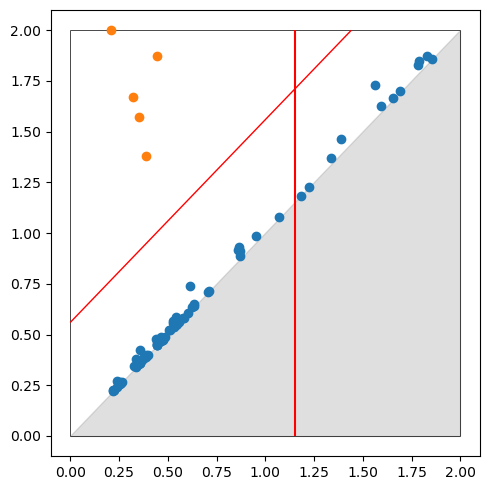

In [353]:
bpp = BasePersistentPattern(80,10,n_patterns=5,alpha=10,beta=0.,n_jobs=4,)
bpp.fit(signal)
bpp.plot_persistence_diagram()

(<Figure size 2000x500 with 1 Axes>, <Axes: >)

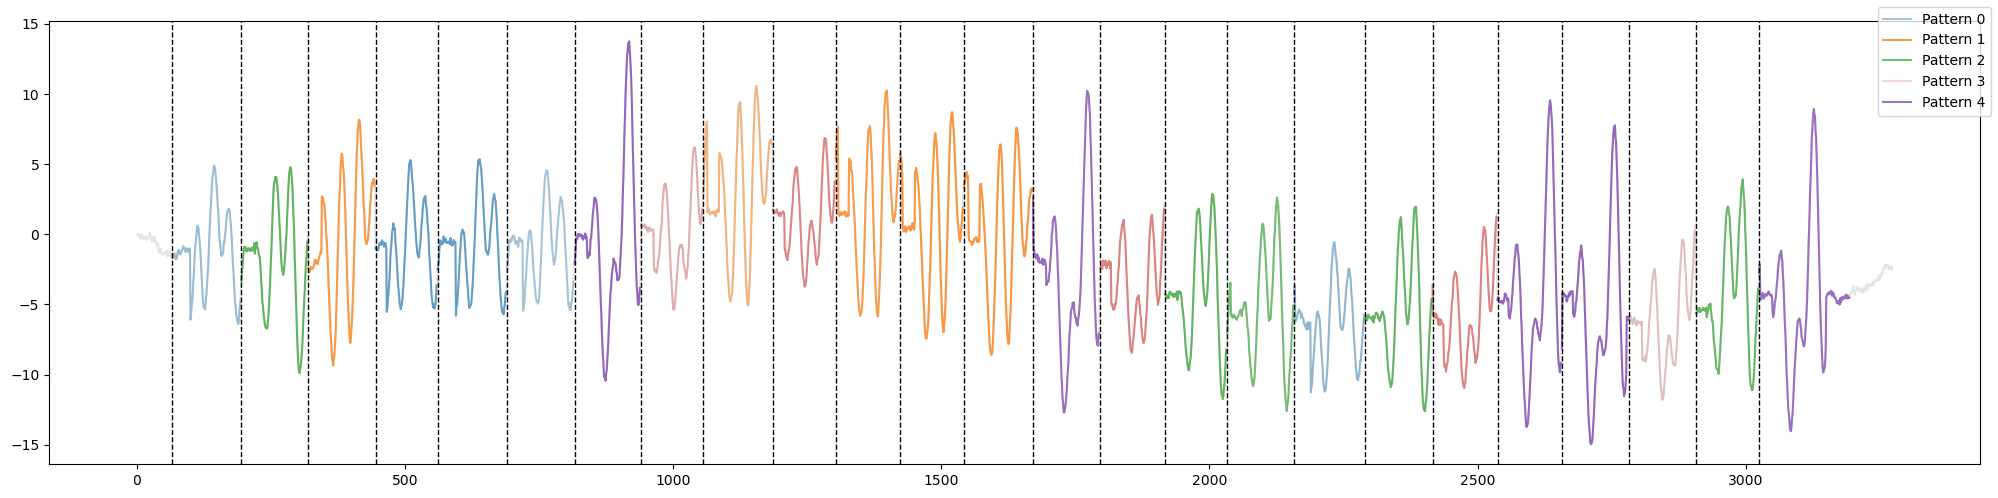

In [354]:
plot_signal_pattern(signal,*bpp.prediction_birth_list_)

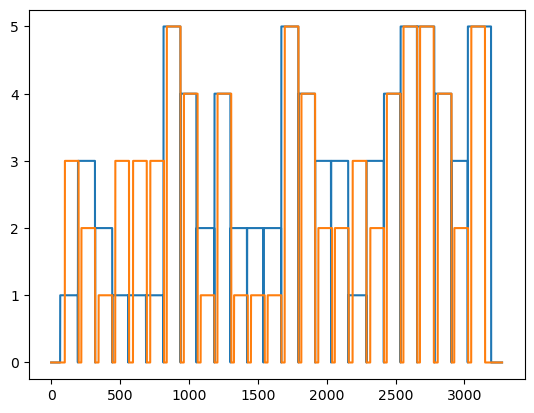

In [355]:
pred_mask = bpp.prediction_mask_.copy()
pred_mask *= np.arange(1,pred_mask.shape[0]+1).reshape(-1,1)
pred_mask = np.sum(pred_mask,axis=0)
plt.plot(pred_mask)

true_mask = sg.labels_.copy()
true_mask *= np.arange(1,true_mask.shape[0]+1).reshape(-1,1)
true_mask = np.sum(true_mask,axis=0)
plt.plot(true_mask)



In [356]:
from competitors import MatrixProfile

In [357]:
from sklearn.metrics import adjusted_mutual_info_score

In [358]:
adjusted_mutual_info_score(true_mask,pred_mask)

0.6975160017837765

In [359]:
sg.labels_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [360]:
mp = MatrixProfile(5,100,"NormalizedEuclidean")
mp.fit(signal)

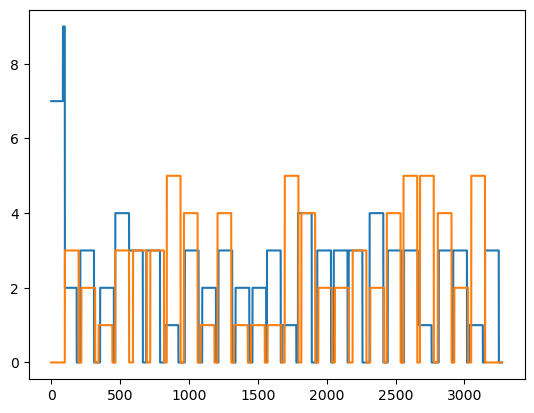

In [361]:
pred_mask = mp.prediction_mask_.copy()
pred_mask *= np.arange(1,pred_mask.shape[0]+1).reshape(-1,1)
pred_mask = np.sum(pred_mask,axis=0)
plt.plot(pred_mask)

true_mask = sg.labels_.copy()
true_mask *= np.arange(1,true_mask.shape[0]+1).reshape(-1,1)
true_mask = np.sum(true_mask,axis=0)
plt.plot(true_mask)

In [362]:
adjusted_mutual_info_score(true_mask,pred_mask)

0.30309252517409535

In [363]:
from metric import SingleEventScore

In [364]:
ses = SingleEventScore(100)

In [365]:
np.hstack(np.array(ses.all_score(sg.labels_[:,0],mp.prediction_mask_[:,0])).T)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.